# Calculating CpG ratio for the *Acropora hyacinthus* transcriptome

This workflow calculates CpG ratio, or CpG O/E, for contigs in the *Acropora hyacinthus* [transcriptome](http://palumbi.stanford.edu/data/33496_Ahyacinthus_CoralContigs.fasta.zip). CpG ratio is an estimate of germline DNA methylation.

This workflow is an extension of another IPython notebook workflow, `Ahya_blast_anno.ipynb`, that generates an annotation of the same transcriptome. This workflow assumes that you have created the directories and files specified in the annotation workflow.

In [11]:
cd /Users/jd/Documents/Projects/Coral-CpG-ratio-MS/data/Ahya

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/data/Ahya


In [12]:
#fasta file
!head -2 33496_Ahyacinthus_CoralContigs.fasta
!echo 
!echo number of seqs =
!fgrep -c ">" 33496_Ahyacinthus_CoralContigs.fasta

>contig27
CAAAATTCCAGCACTCCGTTTTGCATGGTAAACTTGTCTTAGTAGGACACTGTGGAAGATGTACAGCGCAAGACATCACAGTTGCAAGCGCCGACGAACAGCTGTTAAACTCTCCTCTCATATTCTCGAACAAACCAAATATTTCTTCCTCTCTGTTGTTGCTAACCTTTGAATATATGAAGCTGGCATTAGCACAGGACTCAAAGTTTCCGCCGAGCAGTTT

number of seqs =
33496


In [13]:
#Converting FASTA to tabular format and placing output file in analyses directory
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
33496_Ahyacinthus_CoralContigs.fasta > /Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Ahya/fasta2tab


Converted 33496 FASTA records in 66992 lines to tabular format
Total sequence length: 17056543



In [1]:
cd /Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Ahya

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Ahya


In [15]:
#Checking header on new tabular format file
!head -2 fasta2tab

contig27		CAAAATTCCAGCACTCCGTTTTGCATGGTAAACTTGTCTTAGTAGGACACTGTGGAAGATGTACAGCGCAAGACATCACAGTTGCAAGCGCCGACGAACAGCTGTTAAACTCTCCTCTCATATTCTCGAACAAACCAAATATTTCTTCCTCTCTGTTGTTGCTAACCTTTGAATATATGAAGCTGGCATTAGCACAGGACTCAAAGTTTCCGCCGAGCAGTTT
contig88		TGTCCTGTGTTAGAGGCCAGCTTCAACCTCTTGCTTTCCCTGTCAGCCGAGTTTTCTTCTCCTTCAATAAGCTGGGATTTTCGATCTCTACTCAATGTTTCCATCAAACACCTGAGAGTTAAATCTGCCAGATAACGAAGAAATCCTCTTGCTAGAATACTTTTCAAAAGCCCTTCTTCATACATTGATCTTATCCCATTGCAAATTGCGTTGG


In [16]:
#Add column with length of sequence
!perl -e '$col = 2;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
fasta2tab > tab_1


Added column with length of column 2 for 33496 lines.



In [17]:
!wc tab_1

   33496  100488 17731523 tab_1


In [18]:
#The file used to count Cs and Gs will only include the sequence
!awk '{print $2}' tab_1 > tab_2

In [19]:
#This counts CGs - both cases
!echo "CG" | awk -F\[Cc][Gg] '{print NF-1}' tab_2 > CG 

In [20]:
#Counts Cs
!echo "C" | awk -F\[Cc] '{print NF-1}' tab_2 > C 

In [21]:
#Counts Gs
!echo "G" | awk -F\[Gg] '{print NF-1}' tab_2 > G 

In [22]:
#Combining counts
!paste tab_1 \
CG \
C \
G \
> comb
!head -1 comb

contig27		CAAAATTCCAGCACTCCGTTTTGCATGGTAAACTTGTCTTAGTAGGACACTGTGGAAGATGTACAGCGCAAGACATCACAGTTGCAAGCGCCGACGAACAGCTGTTAAACTCTCCTCTCATATTCTCGAACAAACCAAATATTTCTTCCTCTCTGTTGTTGCTAACCTTTGAATATATGAAGCTGGCATTAGCACAGGACTCAAAGTTTCCGCCGAGCAGTTT	223	8	55	42


# Calculating CpGo/e based on [Gavery and Roberts (2010)](http://www.biomedcentral.com/1471-2164/11/483)

<img src="http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png" alt="BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png"/>

In [23]:
#Calculation of CpG o/e
!awk '{print $1, "\t", (($4)/($5*$6))*(($3^2)/($3-1))}' comb > ID_CpG  #use ^ instead of ** for exponent

In [24]:
!head ID_CpG

contig27 	 0.775773
contig88 	 0.459903
contig100 	 0.254614
contig211 	 0.885658
contig405 	 0.689373
contig443 	 1.34126
contig470 	 0.323368
contig503 	 0.941889
contig583 	 0.625727
contig590 	 1.21135


# Now joining CpG to annotation, but first must sort files.

In [2]:
#Sorting Ahya Uniprot/Swissprot annotation file. This file was the result of work done in another notebook: Ahya_blast_anno.ipynb
!sort Ahya_blastx_uniprot_sql.tab | tail -n +2 > Ahya_blastx_uniprot_sql.tab.sorted
!head Ahya_blastx_uniprot_sql.tab.sorted

contig100010	sp	Q08174	PCDH1_HUMAN	45.12	82	42	1	4	240	536	617	2e-14	72.4
contig100021_110093_105915	sp	P10978	POLX_TOBAC	44.34	106	54	3	1932	2243	774	876	4e-14	81.3
contig100025	sp	Q69ZS8	KAZRN_MOUSE	61.76	68	26	0	2	205	450	517	5e-21	90.5
contig100026	sp	Q6ZMW3	EMAL6_HUMAN	68.07	119	38	0	9	365	1805	1923	2e-49	  174
contig100031	sp	B0BNG0	EMC2_RAT	54.35	92	37	3	334	71	204	294	3e-23	95.5
contig100040	sp	Q9P215	POGK_HUMAN	30.00	100	70	0	4	303	490	589	3e-11	63.5
contig100055	sp	Q32M45	ANO4_HUMAN	52.33	86	41	0	259	2	291	376	7e-19	85.5
contig100067	sp	Q58EN8	VP33B_DANRE	52.50	40	17	1	138	257	94	131	4e-07	50.4
contig100105	sp	A4Q9F1	TTLL8_MOUSE	54.79	146	61	1	20	442	525	670	2e-47	  169
contig100110_36597	sp	Q6PDJ1	CAHD1_MOUSE	39.02	164	93	3	24	503	675	835	1e-33	  131


In [25]:
#Sorting Ahya GOSlim annotation file. This file was the result of work done in another notebook: Ahya_blast_anno.ipynb
!sort Ahya_GOSlim.tab | tail -n +2 > Ahya_GOSlim.sorted
!head Ahya_GOSlim.sorted

In [26]:
#Sorting Ahya CpG file
!sort ID_CpG > ID_CpG.sorted
!head ID_CpG.sorted

contig100 	 0.254614
contig100001 	 0.431531
contig100008 	 0.276093
contig100010 	 0.476931
contig100021_110093_105915 	 2.0758
contig100025 	 0.299187
contig100026 	 1.0599
contig100030 	 0.854552
contig100031 	 0.64616
contig100038_111047 	 1.60515


In [12]:
!join ID_CpG.sorted Ahya_blastx_uniprot_sql.tab.sorted | awk '{print $1, "\t", $2}' > Ahya_cpg_anno

In [13]:
!head Ahya_cpg_anno

contig100010 	 0.476931
contig100021_110093_105915 	 2.0758
contig100025 	 0.299187
contig100026 	 1.0599
contig100031 	 0.64616
contig100040 	 0.558145
contig100055 	 0.161543
contig100067 	 0.139249
contig100105 	 0.582234
contig100110_36597 	 0.762749


In [14]:
!join ID_CpG.sorted Ahya_GOSlim.sorted > Ahya_cpg_GOslim

In [15]:
!head Ahya_cpg_GOslim

In [16]:
#Putting tabs in between columns
!awk '{print $1, "\t", $2, "\t", $3, $4, $5, $6}' Ahya_cpg_GOslim > Ahya_cpg_GOslim.tab
!head Ahya_cpg_GOslim.tab

# Now time to plot data using pandas and matplot

In [19]:
import pandas as pd

In [20]:
jData = pd.read_table('Ahya_cpg_GOslim.tab', header=None)
jData

,0,1,2
0,contig100010,0.476931,cell adhesion
1,,NaN,NaN
2,contig100010,0.476931,cell-cell signaling
3,,NaN,NaN
4,contig100010,0.476931,developmental processes
5,,NaN,NaN
6,contig100021_110093_105915,2.075800,DNA metabolism
7,,NaN,NaN
8,contig100021_110093_105915,2.075800,protein metabolism
9,,NaN,NaN


In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt 

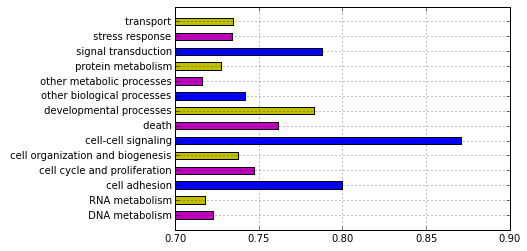

In [23]:
jData.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.7, 0.9, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [24]:
#To plot density curve, must use CpG with original annotation
CpG = pd.read_table('Ahya_cpg_anno', header=None)
CpG

,0,1
0,contig100010,0.476931
1,contig100021_110093_105915,2.075800
2,contig100025,0.299187
3,contig100026,1.059900
4,contig100031,0.646160
5,contig100040,0.558145
6,contig100055,0.161543
7,contig100067,0.139249
8,contig100105,0.582234
9,contig100110_36597,0.762749


[-0.3, 1.7, 0, 1.7]

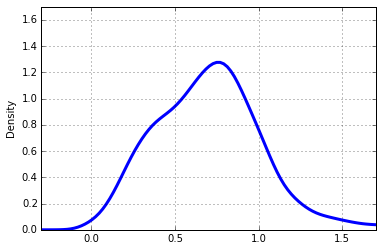

In [25]:
# pandas density plot
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])

## Now looking only at differentially expressed contigs <Ahya_diff_contigs>, joining via common contig IDs

In [37]:
!head -10 Ahya_diff_cpg_GOslim.csv

In [38]:
!wc Ahya_diff_cpg_GOslim.csv

    1085    2394   47683 Ahya_diff_cpg_GOslim.csv


In [39]:
!tr ',' "\t" <Ahya_diff_cpg_GOslim.csv> Ahya_diff_cpg_GOslim

In [40]:
!head -10 Ahya_diff_cpg_GOslim

In [41]:
Ahya_diff = pd.read_table('Ahya_diff_cpg_GOslim')
Ahya_diff

,Column1,Column2,GOslim_bin
0,contig100302_114262_202031,NaN,NaN
1,contig100349,0.524223,RNA metabolism
2,contig100349,0.524223,stress response
3,contig100349,0.524223,other biological processes
4,contig100349,0.524223,other metabolic processes
5,contig102770,1.215500,RNA metabolism
6,contig102770,1.215500,transport
7,contig102770,1.215500,protein metabolism
8,contig102770,1.215500,cell cycle and proliferation
9,contig102770,1.215500,signal transduction


[0.7, 1.1, -1, 14]

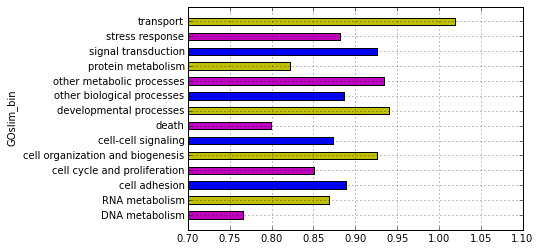

In [42]:
Ahya_diff.groupby("GOslim_bin")["Column2"].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.7, 1.1, -1, 14])

In [43]:
#To plot density curve, must use CpG data WITHOUT annotation
!head Ahya_diff_contigs

contig83050
contig180146_147773
contig216267
contig118470_120199_147241
contig211162
contig181073
contig145010
contig189881_190487_185006
contig185261
contig184253_153996_125963


In [44]:
#Sorting file
!sort Ahya_diff_contigs > Ahya_diff_contigs.sorted
!head Ahya_diff_contigs.sorted

contig100302_114262_202031
contig100349
contig102770
contig103080_193887
contig104395_153016
contig105632_159216
contig105645
contig105949
contig107034
contig107336


In [45]:
!join ID_CpG.sorted Ahya_diff_contigs.sorted > Ahya_diff_cpg
!head Ahya_diff_cpg

contig100302_114262_202031 0.908145
contig100349 0.524223
contig102770 1.2155
contig103080_193887 0.661096
contig104395_153016 0.885662
contig105632_159216 2.26543
contig105645 1.45804
contig105949 0.973447
contig107034 0.727932
contig107336 0.719959


In [46]:
!awk '{print $1, "\t", $2}' Ahya_diff_cpg > Ahya_diff_cpg.tab
!head Ahya_diff_cpg.tab

contig100302_114262_202031 	 0.908145
contig100349 	 0.524223
contig102770 	 1.2155
contig103080_193887 	 0.661096
contig104395_153016 	 0.885662
contig105632_159216 	 2.26543
contig105645 	 1.45804
contig105949 	 0.973447
contig107034 	 0.727932
contig107336 	 0.719959


In [47]:
Ahya_diff2 = pd.read_table('Ahya_diff_cpg.tab', header=None)
Ahya_diff2

,0,1
0,contig100302_114262_202031,0.908145
1,contig100349,0.524223
2,contig102770,1.215500
3,contig103080_193887,0.661096
4,contig104395_153016,0.885662
5,contig105632_159216,2.265430
6,contig105645,1.458040
7,contig105949,0.973447
8,contig107034,0.727932
9,contig107336,0.719959


[-0.3, 1.7, 0, 1.7]

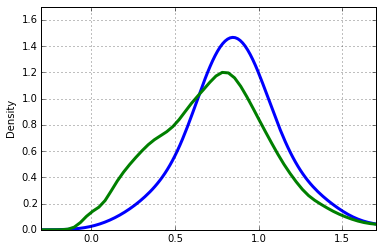

In [52]:
# pandas density plot
Ahya_diff2[1].dropna().plot(kind='kde', linewidth=3);
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])

In [49]:
import numpy as np

In [50]:
np.mean(CpG)

1    0.763211
dtype: float64

In [51]:
np.mean(Ahya_diff2)

1    0.888698
dtype: float64